# Virtual utility

## Case 1: LogNormal(mean,var)

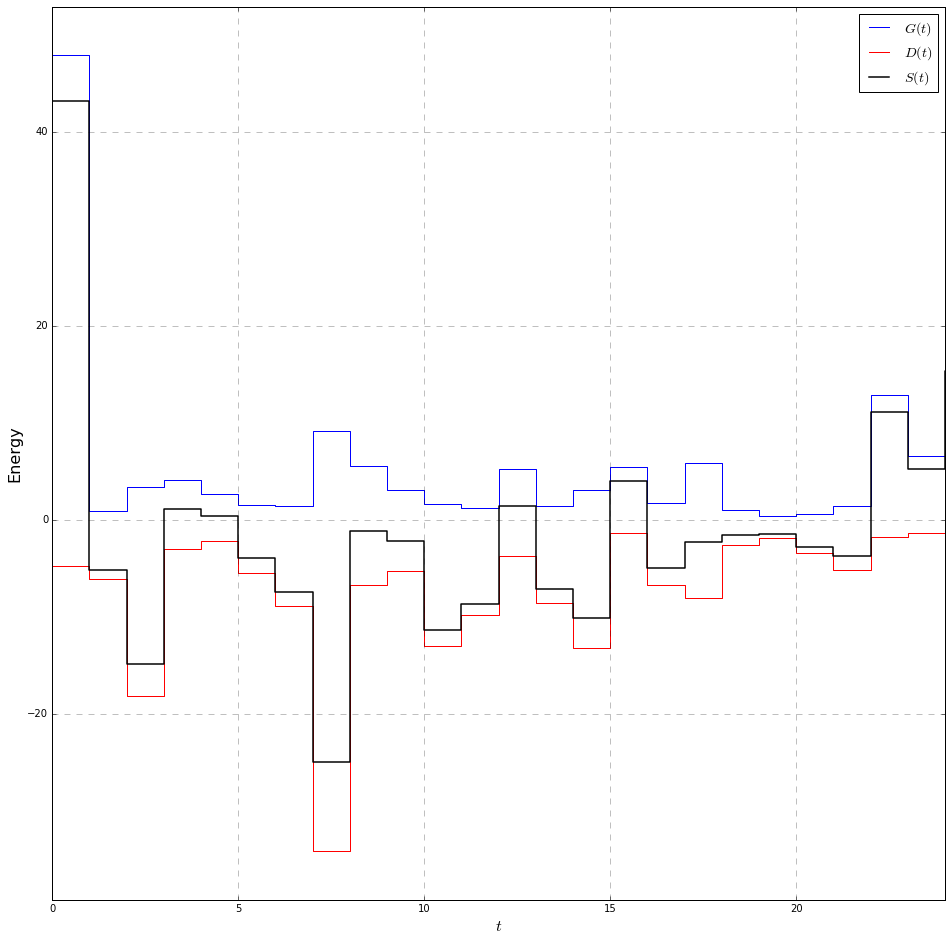

In [44]:
import numpy as np
from matplotlib import pyplot as plt

#Generation distribution
N_gen = np.random.lognormal(1,1,26)

#Consumption distribution
N_cons = np.zeros(26)
mu = [1,1,1,1,1,1,1,1.5,1.5,1.5,1.25,1.25,1.25,1.25,1.25,1.25,1.5,1.75,1.75,1.75,1.5,1,1,1,1]
var = [1,1,1,1,1,1,1,1.25,1.25,1,1,1,1,1,1,1,1.5,1.5,1.5,1.5,1.5,1,1,1,1]
for i in range(0, 25):
    N_cons[i] = np.random.lognormal(mu[i]*1.25,0.75*var[i])
    
#Surplus and deficit
S= N_gen - N_cons 
    
#Plot them all   
y = list(range(0, 26)) 
plt.figure(figsize=(16,16), dpi=1200)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('Energy', fontsize=16)
plt.step(y,N_gen,'b', linewidth=1, label = "$G(t)$")  
plt.step(y,- N_cons,'r', linewidth=1, label = "$D(t)$")
plt.step(y,S,'k', linewidth=1.5, label = "$S(t)$")  
plt.axis([0,24,-max(N_cons)-5,max(N_gen)+5])
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.legend( loc=1, fontsize=14)
plt.show()

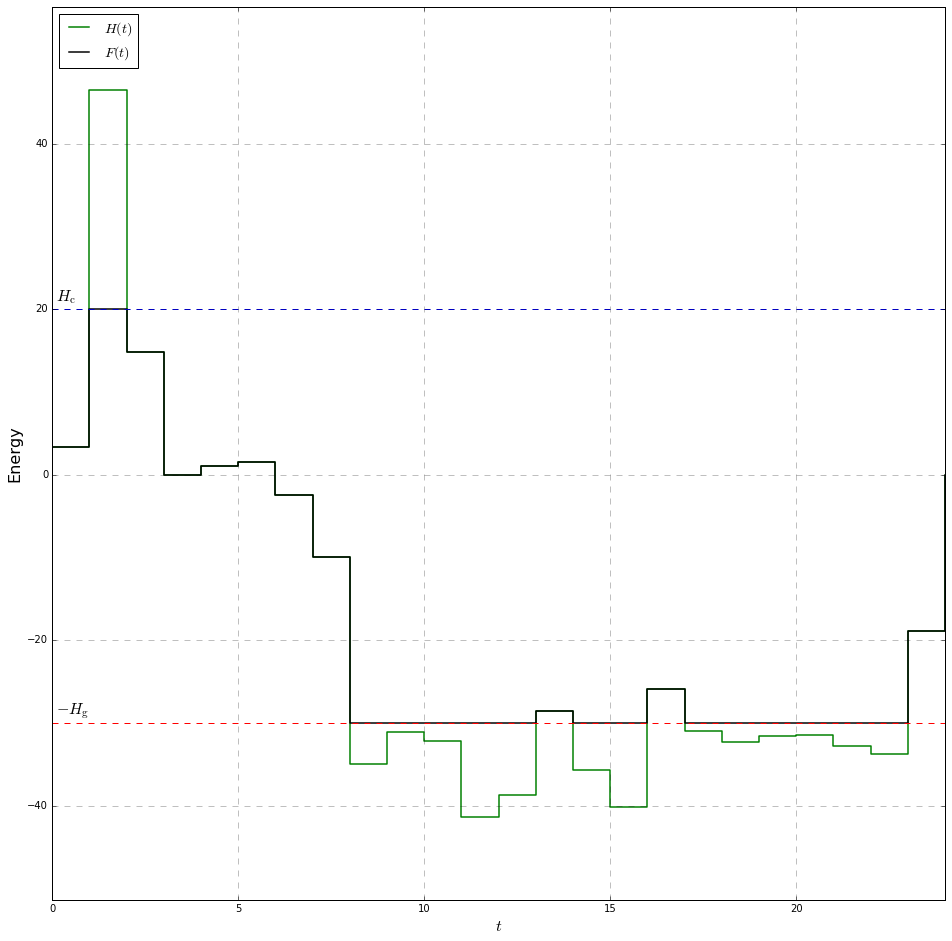

In [45]:
#Storage or generation
H = np.zeros(26)
F = np.zeros(26)
for i in range(1, 25):
    H[i] = F[i-1] + S[i-1]
    if H[i]>0:
        F[i] = min(H[i],H_c)
    else:
        F[i] = max(H[i],-H_g)
H_c=20
H_g=30
#Plot incuding max and min
plt.figure(figsize=(16,16), dpi=1200)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('Energy', fontsize=16)
plt.step(y,H,'g', linewidth=1.5, label = "$H(t)$")
plt.step(y,F,'k', linewidth=1.5, label = "$F(t)$")
plt.plot([0,25],[H_c,H_c],'b--', linewidth=1) 
plt.plot([0,25],[-H_g,-H_g],'r--', linewidth=1)
plt.text(0.1, H_c+1, "$H_\mathrm{c}$", fontsize=16)
plt.text(0.1, -H_g+1, "$-H_\mathrm{g}$", fontsize=16)
plt.axis([0,24,min(min(H)-10,-H_g-10),max(max(H)+10,H_c+10)])
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.legend( loc=2, fontsize=14)
plt.show()

**Question:** What is the probability that (a) $H(t) > H_\mathrm{c}$ and (b) $H(t) < - H_\mathrm{g}$?